<a href="https://colab.research.google.com/github/Jaya-Kurade/Drug-Addicts-Detection-using-Facial-Cues/blob/main/Drug_Addicts_Detection_using_Facial_Cues.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# 2. Mount Google Drive (Optional: if dataset is in Drive)
from google.colab import drive
drive.mount('/content/drive')

# Change this path to your dataset location in Google Drive
# Example: "/content/drive/MyDrive/addict_dataset"
# data_dir = "/content/drive/MyDrive/addict_dataset"

Mounted at /content/drive


In [ ]:
# Data directories
train_dir = '/content/drive/MyDrive/addict_dataset/drug_addict'
val_dir = '/content/drive/MyDrive/addict_dataset/drug_addict'
test_dir = '/content/drive/MyDrive/addict_dataset/drug_addict'

In [ ]:

# Data augmentation for better generalization
train_datagen = ImageDataGenerator(
    rescale=1./255,             # Scale pixel values to [0, 1]
    rotation_range=25,          # Randomly rotate images up to 25 degrees
    width_shift_range=0.2,      # Randomly shift images horizontally by up to 20%
    height_shift_range=0.2,     # Randomly shift images vertically by up to 20%
    shear_range=0.15,           # Shear transformations
    zoom_range=0.15,            # Randomly zoom in/out on images by up to 15%
    horizontal_flip=True,       # Randomly flip images horizontally
    vertical_flip=True,         # Randomly flip images vertically
    fill_mode='nearest'         # Fill in newly created pixels after transformations
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Data generators
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 560 images belonging to 2 classes.
Found 560 images belonging to 2 classes.
Found 560 images belonging to 2 classes.


In [ ]:
# CNN model from scratch
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model
history = model.fit(
    train_data,
    epochs=25,
    validation_data=val_data
)

# Evaluate on the test set
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc:.2f}, Test Loss: {test_loss:.2f}")

Epoch 1/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.6551 - loss: 0.6292 - val_accuracy: 0.5821 - val_loss: 0.8192
Epoch 2/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.7052 - loss: 0.5739 - val_accuracy: 0.7107 - val_loss: 0.7854
Epoch 3/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.6539 - loss: 0.6548 - val_accuracy: 0.5357 - val_loss: 0.7921
Epoch 4/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.6931 - loss: 0.5657 - val_accuracy: 0.6518 - val_loss: 0.6009
Epoch 5/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.6998 - loss: 0.5894 - val_accuracy: 0.5464 - val_loss: 0.8153
Epoch 6/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.6645 - loss: 0.6048 - val_accuracy: 0.6893 - val_loss: 0.5784
Epoch 7/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.6970 - loss: 0.5558 - val_accuracy: 0.6607 - val_loss: 0.5913
Epoch 8/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.7103 - loss: 0.5426 - val_accuracy: 0.7500 - val_loss:

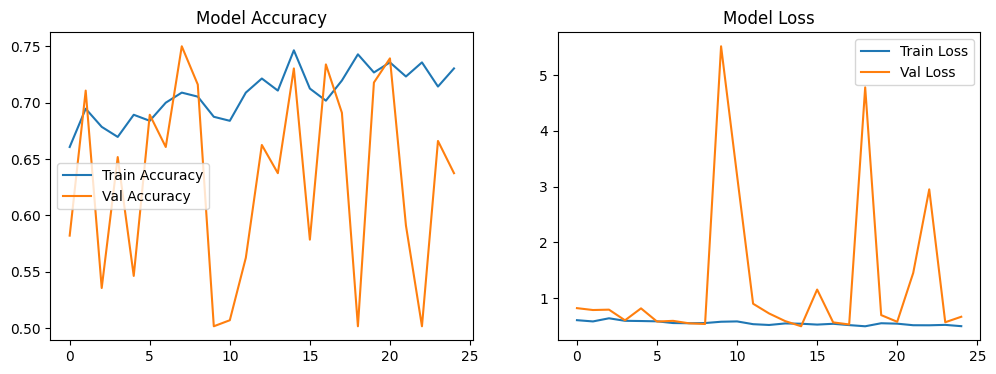

In [ ]:
# Plot training and validation accuracy/loss
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Model Loss')

plt.show()

18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 278ms/step
              precision    recall  f1-score   support

 nonaddicted       0.72      0.45      0.55       280
    addicted       0.60      0.83      0.70       280

    accuracy                           0.64       560
   macro avg       0.66      0.64      0.62       560
weighted avg       0.66      0.64      0.62       560



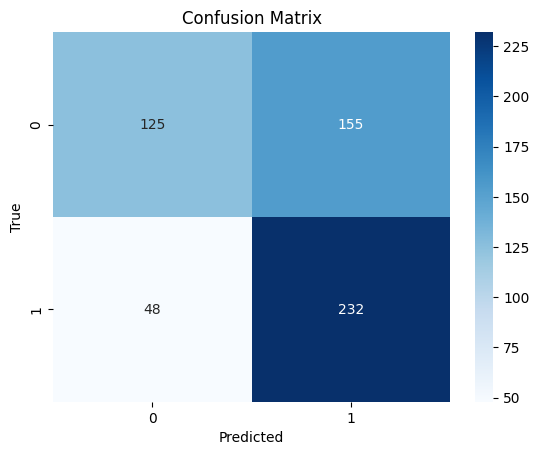

In [ ]:
# Generate predictions and confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

Y_pred = (model.predict(test_data) > 0.5).astype("int32")
cm = confusion_matrix(test_data.classes, Y_pred)
print(classification_report(test_data.classes, Y_pred, target_names=['nonaddicted','addicted']))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(train_data, epochs=1, validation_data=val_data, callbacks=[early_stop])

18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.7655 - loss: 0.4759 - val_accuracy: 0.6125 - val_loss: 1.0850


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_accuracy', mode='max')

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128,128,3))
for layer in base_model.layers:
    layer.trainable = False  # Freeze pre-trained layers

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


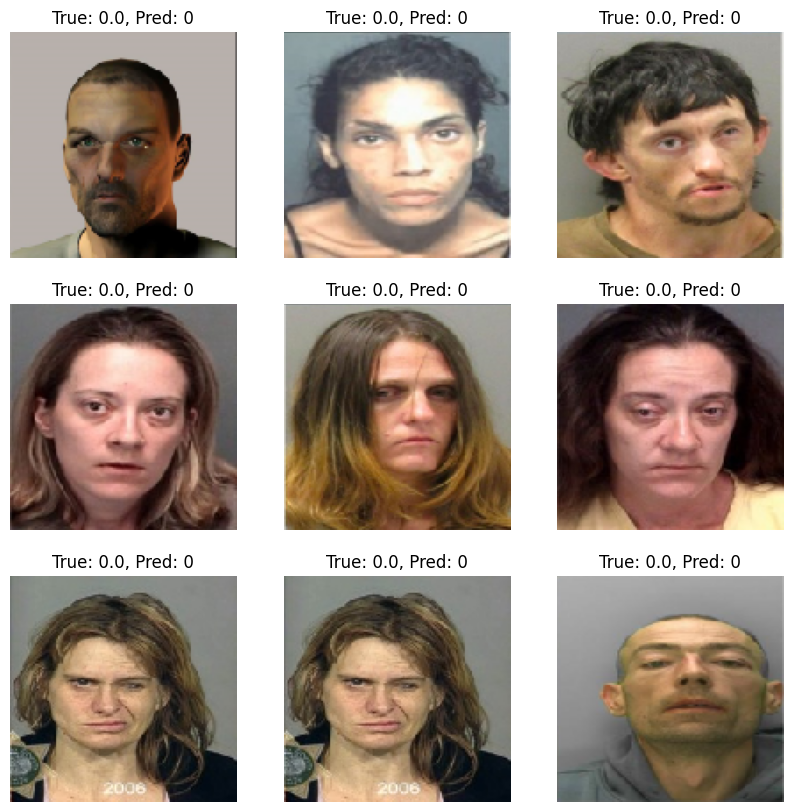

In [ ]:
import random
x, y = next(test_data)
preds = (model.predict(x) > 0.5).astype(int)
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x[i])
    plt.title(f"True: {y[i]}, Pred: {preds[i][0]}")
    plt.axis('off')
plt.show()

In [ ]:
model.save('addiction_detector_model.h5')
# Load it again
model = tf.keras.models.load_model('addiction_detector_model.h5')

In [ ]:
pip install gradio

In [ ]:
import gradio as gr

def predict_image(img):
    img = tf.image.resize(img, (128,128))
    img = np.expand_dims(img/255.0, axis=0)
    pred = model.predict(img)[0][0]
    return "Addicted" if pred > 0.23 else "Non-Addicted"

gr.Interface(fn=predict_image, inputs="image", outputs="label").launch()
####Not required

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://a36a558e6417b96265.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import gradio as gr
import tensorflow as tf
import numpy as np

# Load your trained model
model = tf.keras.models.load_model('addiction_detector_model.h5')

def predict_image(img):
    # Preprocess image
    img = tf.image.resize(img, (128,128))
    img = np.expand_dims(img/255.0, axis=0)

    # Predict
    pred = model.predict(img)[0][0]

    # Log prediction to console
    print(f"Predicted probability: {pred:.4f}")

    # Return readable label
    return f"Addicted ({pred:.2f})" if pred >= 0.37 else f"Non-Addicted ({pred:.2f})"

# Launch Gradio app
gr.Interface(fn=predict_image, inputs="image", outputs="label").launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f577977b7fcb412078.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
